Association Rule and Classificaiton using SKLearn and MLXtend

Importing all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import mlxtend.preprocessing
import mlxtend.frequent_patterns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
import sklearn

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

Question no. 1 Association Rules

In [2]:
basket = pd.read_csv('assignment_basket.csv')

print(basket.head())
print(basket.shape)

   Transaction           Item         date_time period_day weekday_weekend
0            1          Bread  30-10-2016 09:58    morning         weekend
1            2   Scandinavian  30-10-2016 10:05    morning         weekend
2            2   Scandinavian  30-10-2016 10:05    morning         weekend
3            3  Hot chocolate  30-10-2016 10:07    morning         weekend
4            3            Jam  30-10-2016 10:07    morning         weekend
(20507, 5)


In [3]:
basket_weekday = basket.loc[basket['weekday_weekend'] == 'weekday'] #The data from the weekdays were collected to check if there are any major changes between weekday and weekend
basket_weekend = basket.loc[basket['weekday_weekend'] == 'weekend'] #The data was also extracted from weekend

print (basket_weekday.value_counts('Item')[:5])
print (basket_weekend.value_counts('Item')[:5])

Item
Coffee    3543
Bread     2092
Tea        976
Cake       612
Pastry     566
dtype: int64
Item
Coffee    1928
Bread     1233
Tea        459
Cake       413
Pastry     290
dtype: int64


In [4]:
basket_morning = basket.loc[basket['period_day'] == 'morning'] 
basket_afternoon = basket.loc[basket['period_day']== 'afternoon']
#The data were seperated among morning and afternoon datasets
print(basket_morning.shape)
print(basket_afternoon.shape)
print(basket_morning.tail())
print(basket_afternoon.head())

(8404, 5)
(11569, 5)
       Transaction            Item         date_time period_day  \
20465         9664          Coffee  09-04-2017 11:40    morning   
20466         9664           Bread  09-04-2017 11:40    morning   
20467         9665          Coffee  09-04-2017 11:59    morning   
20468         9665           Juice  09-04-2017 11:59    morning   
20469         9665  Spanish Brunch  09-04-2017 11:59    morning   

      weekday_weekend  
20465         weekend  
20466         weekend  
20467         weekend  
20468         weekend  
20469         weekend  
    Transaction          Item         date_time period_day weekday_weekend
86           43  Scandinavian  30-10-2016 12:00  afternoon         weekend
87           43         Fudge  30-10-2016 12:00  afternoon         weekend
88           44        Coffee  30-10-2016 12:05  afternoon         weekend
89           44     Medialuna  30-10-2016 12:05  afternoon         weekend
90           45        Coffee  30-10-2016 12:08  afternoo

In [5]:
print (basket_morning.value_counts('Item')[:5])
print (basket_afternoon.value_counts('Item')[:5])
#The values were checked for the morning and afternoon datasets.

Item
Coffee       2561
Bread        1610
Pastry        604
Tea           456
Medialuna     402
dtype: int64
Item
Coffee      2823
Bread       1661
Tea          930
Cake         731
Sandwich     671
dtype: int64


In [6]:
list_morning = basket_morning.groupby(['Transaction'])['Item'].apply(list).values.tolist()
list_morning[-10:]

[['Coffee', 'Cake'],
 ['Hot chocolate', 'Half slice Monster ', 'My-5 Fruit Shoot'],
 ['Tea'],
 ['Coffee', 'Toast'],
 ['Coffee'],
 ['Coffee', 'Spanish Brunch', 'Extra Salami or Feta'],
 ['Tea', 'Juice', 'Cake'],
 ['Bread'],
 ['Coffee', 'Coffee', 'Bread'],
 ['Coffee', 'Juice', 'Spanish Brunch']]

In [7]:
list_afternoon = basket_afternoon.groupby(['Transaction'])['Item'].apply(list).values.tolist()
list_afternoon[-10:]

[['Coffee'],
 ['Smoothies', 'Sandwich'],
 ['Tacos/Fajita', 'Coke'],
 ['Coffee', 'Tacos/Fajita', 'Toast'],
 ['Bread', 'Spanish Brunch'],
 ['Bread'],
 ['Truffles', 'Tea', 'Spanish Brunch', 'Christmas common'],
 ['Muffin', 'Tacos/Fajita', 'Coffee', 'Tea'],
 ['Coffee', 'Pastry'],
 ['Smoothies']]

Both the dataset were changed into a transactional list where all the item of the same transaction are kept in a single list.

In [8]:
mencoder = mlxtend.preprocessing.TransactionEncoder().fit(list_morning)

mencoded_data = mencoder.transform(list_morning)

morning_trans = pd.DataFrame(mencoded_data, columns = mencoder.columns_)

print (morning_trans)

      Afternoon with the baker  Alfajores  Argentina Night  Art Tray  \
0                        False      False            False     False   
1                        False      False            False     False   
2                        False      False            False     False   
3                        False      False            False     False   
4                        False      False            False     False   
...                        ...        ...              ...       ...   
4098                     False      False            False     False   
4099                     False      False            False     False   
4100                     False      False            False     False   
4101                     False      False            False     False   
4102                     False      False            False     False   

      Baguette  Bakewell  Basket  Bread  Brioche and salami  Brownie  ...  \
0        False     False   False   True               Fals

In [9]:
aencoder = mlxtend.preprocessing.TransactionEncoder().fit(list_afternoon)

aencoded_data = aencoder.transform(list_afternoon)

afternoon_trans = pd.DataFrame(aencoded_data, columns = aencoder.columns_)

print (afternoon_trans)

      Afternoon with the baker  Alfajores  Argentina Night  Art Tray  Bacon  \
0                        False      False            False     False  False   
1                        False      False            False     False  False   
2                        False      False            False     False  False   
3                        False      False            False     False  False   
4                        False      False            False     False  False   
...                        ...        ...              ...       ...    ...   
5084                     False      False            False     False  False   
5085                     False      False            False     False  False   
5086                     False      False            False     False  False   
5087                     False      False            False     False  False   
5088                     False      False            False     False  False   

      Baguette  Bakewell  Bare Popcorn  Bowl Nic Pi

Both the dataset were changed so that each transaction would be recorded as true or false for each itemset.

In [10]:
morning_trans.shape

(4103, 76)

In [11]:
afternoon_trans.shape

(5089, 86)

In [12]:
support_test = [0.5, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 0.0005, 0.0002, 0.0001]

for supp in support_test:
    length = [3, 4, 5]
    for len in length:
        test = mlxtend.frequent_patterns.apriori(morning_trans, min_support=supp, max_len=len, use_colnames=True)
        print ('There are',test.shape[0],'values at support',supp,'and length',len)

#521 values at support 0.0005 and length 3 can be a good amount of dataset

There are 1 values at support 0.5 and length 3
There are 1 values at support 0.5 and length 4
There are 1 values at support 0.5 and length 5
There are 2 values at support 0.2 and length 3
There are 2 values at support 0.2 and length 4
There are 2 values at support 0.2 and length 5
There are 4 values at support 0.1 and length 3
There are 4 values at support 0.1 and length 4
There are 4 values at support 0.1 and length 5
There are 11 values at support 0.05 and length 3
There are 11 values at support 0.05 and length 4
There are 11 values at support 0.05 and length 5
There are 29 values at support 0.02 and length 3
There are 29 values at support 0.02 and length 4
There are 29 values at support 0.02 and length 5
There are 49 values at support 0.01 and length 3
There are 49 values at support 0.01 and length 4
There are 49 values at support 0.01 and length 5
There are 91 values at support 0.005 and length 3
There are 91 values at support 0.005 and length 4
There are 91 values at support 0.005

In [13]:
frequent_morning = mlxtend.frequent_patterns.apriori(morning_trans, min_support = 0.0005, max_len = 3, use_colnames = True)

print (frequent_morning)

      support                        itemsets
0    0.002437      (Afternoon with the baker)
1    0.024616                     (Alfajores)
2    0.000975               (Argentina Night)
3    0.001219                      (Art Tray)
4    0.020473                      (Baguette)
..        ...                             ...
516  0.000731  (Hot chocolate, Tea, Sandwich)
517  0.000731   (Jammie Dodgers, Muffin, Tea)
518  0.001462            (Juice, Muffin, Tea)
519  0.001219        (Pastry, Tea, Medialuna)
520  0.001462           (Pastry, Muffin, Tea)

[521 rows x 2 columns]


In [14]:
rule_morn = mlxtend.frequent_patterns.association_rules(frequent_morning, metric = "confidence", min_threshold = 0.5)
#testing at 50 confidence
rule_morn[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alfajores),(Coffee),0.024616,0.514989,0.014623,0.594059,1.153538,0.001946,1.194783
1,(Art Tray),(Coffee),0.001219,0.514989,0.000731,0.600000,1.165073,0.000104,1.212527
2,(Bakewell),(Coffee),0.004387,0.514989,0.003168,0.722222,1.402403,0.000909,1.746039
3,(Basket),(Coffee),0.001462,0.514989,0.000975,0.666667,1.294526,0.000222,1.455033
4,(Eggs),(Bread),0.002681,0.363149,0.001706,0.636364,1.752349,0.000732,1.751340
5,(Frittata),(Bread),0.001219,0.363149,0.000731,0.600000,1.652215,0.000289,1.592128
6,(Nomad bag),(Bread),0.000975,0.363149,0.000975,1.000000,2.753691,0.000621,inf
7,(Brownie),(Coffee),0.029978,0.514989,0.016330,0.544715,1.057722,0.000891,1.065292
8,(Cake),(Coffee),0.063125,0.514989,0.033146,0.525097,1.019627,0.000638,1.021283
9,(Chocolates),(Coffee),0.000975,0.514989,0.000731,0.750000,1.456342,0.000229,1.940044


As coffee is the most purchased item, it looks like coffee is there with most of the product when there is a one to one relation so, most of the information are trivial.

In [15]:
selection_morn = rule_morn['antecedents'].apply(lambda x: 'Eggs' in x)
rule_morn[selection_morn]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Eggs),(Bread),0.002681,0.363149,0.001706,0.636364,1.752349,0.000732,1.75134


If someone has eggs in their basket in the morning, bread would be the most likely recommendation.

In [16]:
support_test = [0.5, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 0.0005, 0.0002, 0.0001]

for supp in support_test:
    length = [3, 4, 5]
    for len in length:
        test = mlxtend.frequent_patterns.apriori(afternoon_trans, min_support=supp, max_len=len, use_colnames=True)
        print ('There are',test.shape[0],'values at support',supp,'and length',len)

#527 values at support 0.001 and length 3 was used. 500 was used as an arbitary cutoff for values.

There are 0 values at support 0.5 and length 3
There are 0 values at support 0.5 and length 4
There are 0 values at support 0.5 and length 5
There are 2 values at support 0.2 and length 3
There are 2 values at support 0.2 and length 4
There are 2 values at support 0.2 and length 5
There are 5 values at support 0.1 and length 3
There are 5 values at support 0.1 and length 4
There are 5 values at support 0.1 and length 5
There are 12 values at support 0.05 and length 3
There are 12 values at support 0.05 and length 4
There are 12 values at support 0.05 and length 5
There are 41 values at support 0.02 and length 3
There are 41 values at support 0.02 and length 4
There are 41 values at support 0.02 and length 5
There are 70 values at support 0.01 and length 3
There are 70 values at support 0.01 and length 4
There are 70 values at support 0.01 and length 5
There are 130 values at support 0.005 and length 3
There are 130 values at support 0.005 and length 4
There are 130 values at support 0.

In [17]:
frequent_afternoon = mlxtend.frequent_patterns.apriori(afternoon_trans, min_support = 0.001, max_len = 3, use_colnames = True)

print (frequent_afternoon)

      support                          itemsets
0    0.003734        (Afternoon with the baker)
1    0.044606                       (Alfajores)
2    0.006092                        (Art Tray)
3    0.013166                        (Baguette)
4    0.005895                        (Bakewell)
..        ...                               ...
522  0.001179    (Hot chocolate, Tea, Sandwich)
523  0.001179  (Juice, Mineral water, Sandwich)
524  0.001572            (Juice, Tea, Sandwich)
525  0.001179        (Tea, Sandwich, Medialuna)
526  0.002948             (Soup, Tea, Sandwich)

[527 rows x 2 columns]


In [18]:
rule_aft = mlxtend.frequent_patterns.association_rules(frequent_afternoon, metric = "confidence", min_threshold = 0.5)

rule_aft[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alfajores),(Coffee),0.044606,0.459815,0.022991,0.515419,1.120925,0.002480,1.114745
1,(Art Tray),(Coffee),0.006092,0.459815,0.004520,0.741935,1.613551,0.001719,2.093216
2,(Bakewell),(Coffee),0.005895,0.459815,0.003144,0.533333,1.159886,0.000433,1.157539
3,(Cake),(Coffee),0.136766,0.459815,0.071920,0.525862,1.143638,0.009033,1.139299
4,(Crisps),(Coffee),0.002162,0.459815,0.001376,0.636364,1.383955,0.000382,1.485508
5,(Extra Salami or Feta),(Coffee),0.005109,0.459815,0.003930,0.769231,1.672913,0.001581,2.340800
6,(Frittata),(Coffee),0.014934,0.459815,0.007860,0.526316,1.144624,0.000993,1.140390
7,(Granola),(Coffee),0.002162,0.459815,0.001376,0.636364,1.383955,0.000382,1.485508
8,(Hearty & Seasonal),(Coffee),0.017882,0.459815,0.009825,0.549451,1.194938,0.001603,1.198947
9,(Jammie Dodgers),(Coffee),0.016310,0.459815,0.008646,0.530120,1.152899,0.001147,1.149624


The situation is similar as most of the product is bouth with coffee in the afternoon as well.

In [19]:
selection_aft = rule_aft['antecedents'].apply(lambda x: 'Coke' in x and 'Juice' in x)
rule_aft[selection_aft]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
111,"(Juice, Coke)",(Sandwich),0.002555,0.115936,0.001572,0.615385,5.307953,0.001276,2.298566


For anyone buying Coke and Juice in the afternoon, Sandwich would be the go to recommendation

In [20]:
selectiona = rule_morn['antecedents'].apply(lambda x: 'Toast' in x)
selectionb = rule_aft['antecedents'].apply(lambda x: 'Toast' in x)
#running rules for toast in both morning and afternoon database
rule_morn[selectiona]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(Toast),(Coffee),0.049720,0.514989,0.035827,0.720588,1.399230,0.010222,1.735829
66,"(Toast, Medialuna)",(Bread),0.003656,0.363149,0.001950,0.533333,1.468635,0.000622,1.364681
77,"(Toast, Brownie)",(Tea),0.000731,0.107482,0.000731,1.000000,9.303855,0.000653,inf
87,"(Toast, Cake)",(Coffee),0.002194,0.514989,0.001219,0.555556,1.078772,0.000089,1.091275
89,"(Toast, Cake)",(Tea),0.002194,0.107482,0.001219,0.555556,5.168808,0.000983,2.008165
97,"(Cookies, Toast)",(Coffee),0.002681,0.514989,0.001950,0.727273,1.412210,0.000569,1.778374
98,"(Extra Salami or Feta, Toast)",(Coffee),0.000731,0.514989,0.000731,1.000000,1.941789,0.000355,inf
116,"(Toast, Juice)",(Coffee),0.001706,0.514989,0.000975,0.571429,1.109594,0.000096,1.131692
125,"(Toast, Medialuna)",(Coffee),0.003656,0.514989,0.002194,0.600000,1.165073,0.000311,1.212527
126,"(Toast, Mineral water)",(Coffee),0.000731,0.514989,0.000731,1.000000,1.941789,0.000355,inf


In [21]:
rule_aft[selectionb]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21,(Toast),(Coffee),0.022401,0.459815,0.015131,0.675439,1.468935,0.004830,1.664353
38,"(Toast, Bread)",(Coffee),0.003341,0.459815,0.001769,0.529412,1.151357,0.000232,1.147893
60,"(Toast, Cake)",(Coffee),0.002358,0.459815,0.001965,0.833333,1.812322,0.000881,3.241108
82,"(Toast, Hot chocolate)",(Coffee),0.002751,0.459815,0.001376,0.500000,1.087393,0.000111,1.080369
91,"(Juice, Toast)",(Coffee),0.002948,0.459815,0.002162,0.733333,1.594843,0.000806,2.025693
105,"(Toast, Sandwich)",(Coffee),0.002751,0.459815,0.001376,0.500000,1.087393,0.000111,1.080369
108,"(Toast, Spanish Brunch)",(Coffee),0.001572,0.459815,0.001179,0.750000,1.631090,0.000456,2.160739
110,"(Toast, Tea)",(Coffee),0.005502,0.459815,0.002751,0.500000,1.087393,0.000221,1.080369


Toast in the morning could sometimes be recommended with Tea but Coffee is the most likely and in the day as well coffee is the most common so anyone who has toast in their basket would be recommended with Coffee be it in the morning or the afternoon.

Question no. 2 Classification

In [22]:
patients = pd.read_csv('patient.csv')

patients.head()

,age,gender,pain,blood_pressure,cholesterol,blood_sugar,heart_rate,exercise,outcome
0,63,1,3,145,233,1,150,0,1
1,37,1,2,130,250,0,187,0,1
2,41,0,1,130,204,0,172,0,1
3,56,1,1,120,236,0,178,0,1
4,57,0,0,120,354,0,163,1,1


In [23]:
patients.isna().sum()
#checking for null values

age               0
gender            0
pain              0
blood_pressure    0
cholesterol       0
blood_sugar       0
heart_rate        0
exercise          0
outcome           0
dtype: int64

In [24]:
patients.describe()

,age,gender,pain,blood_pressure,cholesterol,blood_sugar,heart_rate,exercise,outcome
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,149.646865,0.326733,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,22.905161,0.469794,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,153.000000,0.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,166.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,202.000000,1.000000,1.000000


In [25]:
patients.corr()

,age,gender,pain,blood_pressure,cholesterol,blood_sugar,heart_rate,exercise,outcome
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.398522,0.096801,-0.225439
gender,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.044020,0.141664,-0.280937
pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.295762,-0.394280,0.433798
blood_pressure,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.046698,0.067616,-0.144931
cholesterol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.009940,0.067023,-0.085239
blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.008567,0.025665,-0.028046
heart_rate,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,1.000000,-0.378812,0.421741
exercise,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.378812,1.000000,-0.436757
outcome,-0.225439,-0.280937,0.433798,-0.144931,-0.085239,-0.028046,0.421741,-0.436757,1.000000


In [26]:
patients.groupby('outcome').mean()

,age,gender,pain,blood_pressure,cholesterol,blood_sugar,heart_rate,exercise
outcome,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,139.101449,0.550725
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,158.466667,0.139394


<AxesSubplot:xlabel='blood_pressure', ylabel='heart_rate'>

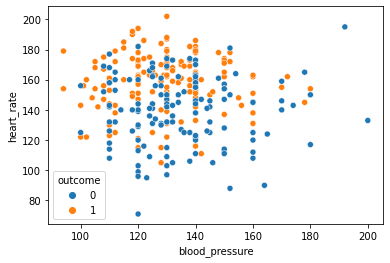

In [27]:
sns.scatterplot(x= 'blood_pressure', y= 'heart_rate', hue= 'outcome', data= patients)

<AxesSubplot:xlabel='outcome', ylabel='heart_rate'>

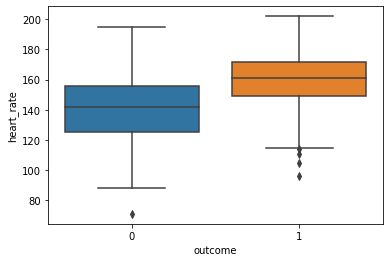

In [28]:
sns.boxplot(x='outcome', y='heart_rate', data=patients)

Running some general exploration on the dataset we can see that things like heart rate and pain has some impact on the outcome while blood pressure doesn't have the same kind of impact in heart attack from the given dataset.

In [29]:
X = patients.drop(['outcome'], axis=1)
y= patients.outcome
#Selecting the value for x and y and splitting them in training and test set. Random state 42 was used as general
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [30]:
log_pat = LogisticRegression(random_state=42)
log_pat.fit(X_train, y_train)
pred_pat = log_pat.predict(X_test)

print (confusion_matrix(y_test, pred_pat))
print (classification_report(y_test, pred_pat))


[[28  7]
 [ 7 34]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        35
           1       0.83      0.83      0.83        41

    accuracy                           0.82        76
   macro avg       0.81      0.81      0.81        76
weighted avg       0.82      0.82      0.82        76



/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The classification without any kind of optimization on logistic regression has an accuracy of 82%. The concern is that 7 true values were classified as false which can be scary in such cases.

In [31]:
tree_pat = DecisionTreeClassifier(random_state=42)
tree_pat.fit(X_train, y_train)
pred_tree = tree_pat.predict(X_test)

print (confusion_matrix(y_test, pred_tree))
print (classification_report(y_test, pred_tree))

[[26  9]
 [ 8 33]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75        35
           1       0.79      0.80      0.80        41

    accuracy                           0.78        76
   macro avg       0.78      0.77      0.77        76
weighted avg       0.78      0.78      0.78        76



General decision tree classifier has a worse accuracy of 78% and classifies 8 of the true value as false causing more risk as compared to logistic regression.

In [32]:
print('Depth of tree:', tree_pat.tree_.max_depth)
print('Number of nodes in tree:', tree_pat.tree_.node_count)
#checking the depth and nodes to optimize the tree

Depth of tree: 11
Number of nodes in tree: 97


In [33]:
opt_tree_pat = DecisionTreeClassifier(random_state=42)

criterion = ['gini', 'entropy']
max_depth = [2, 4, 6, 8, 10, 11]
weights = ['balanced', {0:0.5, 1:0.5}, {0:0.2,1:0.8}]

grid = dict(criterion = criterion, max_depth = max_depth, class_weight = weights)
grid_search = GridSearchCV(estimator= opt_tree_pat, param_grid=grid, scoring='accuracy')
grid_result = grid_search.fit (X,y)

print ('Parameters:', grid_result.best_params_)

Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2}


In [34]:
#Using the best parameters to optimize the decision tree classifier.
tree_pat = DecisionTreeClassifier(criterion='gini', class_weight='balanced', max_depth=2, random_state=42)
tree_pat.fit(X_train, y_train)
pred_tree = tree_pat.predict(X_test)
print (confusion_matrix(y_test, pred_tree))
print (classification_report(y_test, pred_tree))

[[30  5]
 [10 31]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        35
           1       0.86      0.76      0.81        41

    accuracy                           0.80        76
   macro avg       0.81      0.81      0.80        76
weighted avg       0.81      0.80      0.80        76



After the optimization, the decision tree improved from 78% to 80%.

In [35]:
bag_pat = BaggingClassifier(base_estimator= opt_tree_pat, n_estimators=300, random_state=42)
bag_pat.fit(X_train, y_train)
pred_bag_pat = bag_pat.predict(X_test)

print(confusion_matrix(y_test, pred_bag_pat))
print(classification_report(y_test, pred_bag_pat))

[[29  6]
 [ 7 34]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        35
           1       0.85      0.83      0.84        41

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



The bagging classifier improves the accuracy but it improves by minimizing false positives while the false negatives are more worrying. False negatives have not improved.

Please beware that the following code took 40 seconds to run on my computer.

In [36]:
grid = dict(criterion = criterion, max_depth = max_depth, class_weight = weights)
forest_pat = RandomForestClassifier(n_estimators=300, random_state=42)
grid_search = GridSearchCV(estimator=forest_pat, param_grid=grid, scoring='accuracy')
grid_result = grid_search.fit(X, y)
print ('Parameters:', grid_result.best_params_)
print ('Results:', grid_result.best_score_)

Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4}
Results: 0.7722404371584699


The best result from the random forest was at 77% which is the worst among the four classification models.

In [37]:
best_model = grid_result.best_estimator_

pd.Series(data = best_model.feature_importances_, index=X_train.columns).sort_values()
#checking the predictors with the most impact

blood_sugar       0.011466
cholesterol       0.067525
blood_pressure    0.076922
gender            0.082020
age               0.123445
exercise          0.144409
heart_rate        0.198181
pain              0.296033
dtype: float64

Age, Excercise, Heart Rate and Pain seem to be the most important predictors in this question.

In [38]:
X = patients[['age', 'exercise', 'heart_rate', 'pain']]
y = patients.outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
select_pat = DecisionTreeClassifier(random_state=42, class_weight='balanced', criterion='gini', max_depth=2)
select_pat.fit(X_train, y_train)
select_pred = select_pat.predict(X_test)

print (confusion_matrix(y_test, select_pred))
print (classification_report(y_test, select_pred))

[[30  5]
 [10 31]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        35
           1       0.86      0.76      0.81        41

    accuracy                           0.80        76
   macro avg       0.81      0.81      0.80        76
weighted avg       0.81      0.80      0.80        76



When taking only those four predictors the accuracy is 80% it improves again the false positives but the false negative has gone the worst when using only the four variables. The best accuracy was 83% for the bagging classifier.

Question No. 3 Data Science

In [39]:
estate = pd.read_csv('House_assignment.csv', index_col=0)
estate.head()

,Area,Rooms,Yard,Floors,Owners,Year,Basement,Attic,Garage,Storage,Guest,Price
0,75523,3,0,63,8,2005,4313,9005,956,0,7,7559081.5
1,80771,39,1,98,6,2015,3653,2436,128,1,2,8085989.5
2,55712,58,0,19,8,2021,2937,8852,135,1,9,5574642.1
3,32316,47,0,6,4,2012,659,7141,359,0,3,3232561.2
4,70429,19,1,90,7,1990,8435,2429,292,1,4,7055052.0


In [40]:
estate.isna().sum()
#checking for null values

Area        0
Rooms       0
Yard        0
Floors      0
Owners      0
Year        0
Basement    0
Attic       0
Garage      0
Storage     0
Guest       0
Price       0
dtype: int64

In [41]:
estate.describe()

,Area,Rooms,Yard,Floors,Owners,Year,Basement,Attic,Garage,Storage,Guest,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,50.276300,5.521700,2005.48850,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,28.889171,2.856667,9.30809,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,1.000000,1.000000,1990.00000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,25.000000,3.000000,1997.00000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,50.000000,5.000000,2005.50000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,76.000000,8.000000,2014.00000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,100.000000,10.000000,2021.00000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [42]:
estate.corr()

,Area,Rooms,Yard,Floors,Owners,Year,Basement,Attic,Garage,Storage,Guest,Price
Area,1.000000,0.009573,-0.006650,0.001109,0.016619,-0.007207,-0.003960,-0.000588,-0.017246,-0.003486,-0.000623,0.999999
Rooms,0.009573,1.000000,-0.011240,0.022244,0.016766,0.003978,-0.013990,0.012061,0.023188,-0.004760,-0.015529,0.009591
Yard,-0.006650,-0.011240,1.000000,-0.000883,0.004279,0.002214,-0.008558,-0.003085,-0.004626,-0.009506,-0.007276,-0.006119
Floors,0.001109,0.022244,-0.000883,1.000000,0.002463,0.005022,0.006228,-0.000270,0.011303,0.003616,-0.021155,0.001654
Owners,0.016619,0.016766,0.004279,0.002463,1.000000,0.006858,-0.000862,0.000719,0.020268,0.031707,-0.006082,0.016619
Year,-0.007207,0.003978,0.002214,0.005022,0.006858,1.000000,-0.005506,0.013773,0.005687,-0.007868,-0.005431,-0.007210
Basement,-0.003960,-0.013990,-0.008558,0.006228,-0.000862,-0.005506,1.000000,-0.003180,0.000117,-0.010815,-0.020732,-0.003967
Attic,-0.000588,0.012061,-0.003085,-0.000270,0.000719,0.013773,-0.003180,1.000000,-0.000611,-0.000789,-0.011995,-0.000600
Garage,-0.017246,0.023188,-0.004626,0.011303,0.020268,0.005687,0.000117,-0.000611,1.000000,0.032863,-0.017316,-0.017229
Storage,-0.003486,-0.004760,-0.009506,0.003616,0.031707,-0.007868,-0.010815,-0.000789,0.032863,1.000000,0.015186,-0.003485


<AxesSubplot:>

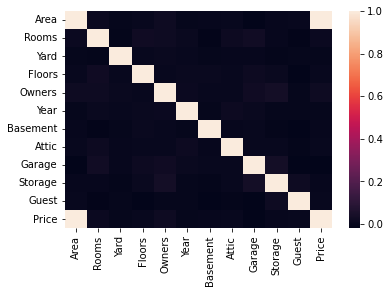

In [43]:
sns.heatmap (data=estate.corr())
#the area and price are very closely correlated in these dataset

<AxesSubplot:xlabel='Area', ylabel='Price'>

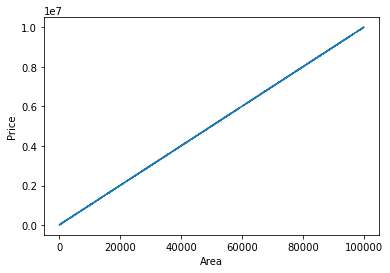

In [44]:
sns.lineplot (x='Area', y='Price', data=estate)

A very linear graph is generated by the line plot between price and area.

In [45]:
X = estate.drop('Price', axis=1)
y = estate['Price']

#creating the x and y value for the dataset and creating a test and training set from them

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

estate_tree = DecisionTreeRegressor(random_state=42)

estate_tree_fit = estate_tree.fit(X_train, y_train)


In [46]:
y_pred = estate_tree_fit.predict(X_test)
mse_tree = mse(y_test, y_pred)

print ("The unoptimized tree regessor has an MSE of", mse_tree)

The unoptimized tree regessor has an MSE of 31188128.111196216


In [47]:
print('Depth of tree:', estate_tree.tree_.max_depth)
print('Number of nodes in tree:', estate_tree.tree_.node_count)

Depth of tree: 19
Number of nodes in tree: 14999


In [48]:
param_dt = {'max_depth': [3, 6, 9, 12, 15, 18], 'min_samples_leaf': [5, 10, 15, 20, 25]}
grid_dt = GridSearchCV(estimator=estate_tree, param_grid=param_dt, scoring='neg_mean_squared_error')
grid_result = grid_dt.fit(X_train, y_train)
print ('Best Param:', grid_result.best_params_ )

Best Param: {'max_depth': 12, 'min_samples_leaf': 5}


The parameters were optimized for the decision tree regressor to check if it can improve the mean squared error

In [49]:
estate_tree_2 = DecisionTreeRegressor(max_depth=12, min_samples_leaf=5, random_state=42)
estate_tree_fit_2 = estate_tree_2.fit(X_train, y_train)
y_pred = estate_tree_fit_2.predict(X_test)
mse_opt_tree = mse (y_test, y_pred)

print ('MSE for optimized tree:', mse_opt_tree)

MSE for optimized tree: 26528187.961148534


The mean squared error improved by almost 15% in this case from the unoptimized set.

In [50]:
estate_lin = LinearRegression()
estate_lin_fit = estate_lin.fit(X_train, y_train)
y_pred = estate_lin_fit.predict(X_test)
mse_lin = mse(y_test, y_pred)
print ("Linear Regression MSE:", mse_lin)

Linear Regression MSE: 5818383.243235399


Linear regression sees almost 80% better results as compared to the optimized decision tree regression.

In [51]:
estate_rand = RandomForestRegressor(n_estimators=200, random_state=42)
estate_rand.fit(X_train, y_train)
y_pred_rand = estate_rand.predict(X_test)
mse_rand = mse(y_test, y_pred_rand)
print ('MSE of Random Forest:',mse_rand )

MSE of Random Forest: 15920102.67395532


The unoptimized random forest improves the unoptimized decision tree by almost halving the mean squared error.

Please beware that the code below took around 9 minutes to run on my machine. These are the optimizer for the random forest regressor.

In [52]:
grid = dict(max_depth = [3, 6, 9, 12, 15, 18], min_samples_leaf = [1, 5, 10, 15, 20])

forest_est = RandomForestRegressor(n_estimators = 200, random_state = 42)

grid_search = GridSearchCV(estimator=estate_rand, param_grid=grid, scoring='neg_mean_squared_error')

grid_result = grid_search.fit(X, y)

# Print out the best result
print("Best result is obtained using", grid_result.best_params_)

Best result is obtained using {'max_depth': 12, 'min_samples_leaf': 5}


In [53]:
estate_opt_rand = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=12, min_samples_leaf=5)

estate_opt_rand.fit(X_train, y_train)
y_pred_opt_rand = estate_opt_rand.predict(X_test)
mse_opt_rand = mse(y_test, y_pred_opt_rand)
print ('The MSE for the optimized random forest is', mse_opt_rand)

The MSE for the optimized random forest is 15657818.034145297


There has been a small improvement with the optimized random forest which is 1 percent improvement compared to the original random forest. So, linear regression is the best way method in the dataset.